In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import ttest_ind,f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [2]:
df=pd.read_csv('\\Users\\adilm\\Desktop\\project data set\\Medicaldataset.csv')

In [3]:
df.head(3)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative


In [4]:
df.shape

(1319, 9)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [19]:
df['Blood sugar']=df['Blood sugar'].astype(int)

In [6]:
df.isna().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [21]:
df['Gender'].unique()
df['Result'].unique()

array(['negative', 'positive'], dtype=object)

In [16]:
df.describe() #otliers in age , heart rate , blod suagr,ck-mb,tropin high outlier

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [22]:
#applying i qr to minimize the outliers 

In [ ]:
Q1 = df['Blood sugar'].quantile(0.25)
Q3 = df['Blood sugar'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['Blood sugar'] >= lower_bound) & (df['Blood sugar'] <= upper_bound)]

In [25]:
Q1 =df['Age'].quantile(0.25)
Q3 =df['Age'].quantile(0.75)
IQR =Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df['Age']>=lower_bound) & (df['Age']<=upper_bound)]


In [26]:
Q1=df['Heart rate'].quantile(0.25)
Q3=df['Heart rate'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df['Heart rate']>=lower_bound)&(df['Heart rate']<=upper_bound)]

In [27]:
Q1=df['CK-MB'].quantile(0.25)
Q3=df['CK-MB'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df['CK-MB']>=lower_bound)&(df['CK-MB']<=upper_bound)]

In [28]:
Q1=df['Troponin'].quantile(0.25)
Q3=df['Troponin'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df['Troponin']>=lower_bound)&(df['Troponin']<=upper_bound)]

In [ ]:
'''for column in df.select_dtypes(include=['number']).columns:  # Iterate only over numeric columns
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]  # Filter the DataFrame

print("\nDataFrame after outlier removal:")
print(df)'''

In [30]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,55.545977,0.631034,75.127586,127.190805,72.180460,147.171264,3.078591,0.023022
std,13.712973,0.482802,13.818020,25.812378,14.188549,77.807303,2.095211,0.035280
min,20.000000,0.000000,36.000000,65.000000,38.000000,35.000000,0.321000,0.001000
25%,45.000000,0.000000,63.000000,110.000000,61.000000,97.000000,1.600000,0.005000
50%,57.000000,1.000000,74.000000,125.000000,71.500000,115.000000,2.480000,0.009000
75%,65.000000,1.000000,84.000000,144.000000,81.000000,173.250000,4.027500,0.023000
max,91.000000,1.000000,116.000000,223.000000,154.000000,541.000000,11.870000,0.208000


In [34]:
df['Result']=df['Result'].map({'positive':1,'negative':0})

In [38]:
#stats

In [39]:
#for gender we will use ttest
# for other f_oneway

In [41]:
female=df[df['Gender']==0]['Result']
male=df[df['Gender']==1]['Result']
result=ttest_ind(a=female,b=male,equal_var=False)
print(result)

TtestResult(statistic=-2.1443379731431675, pvalue=0.03235817993641584, df=682.8109393118369)


In [42]:
print("There’s enough statistical evidence to say the two groups don’t have the same average — the 1-group tends to have higher values.")

There’s enough statistical evidence to say the two groups don’t have the same average — the 1-group tends to have higher values.


In [43]:
#now doing graphs


In [45]:
''' 
1.corr
2.gender and heart attack
3.age and heart attact(kde)



'''

SyntaxError: incomplete input (3857640367.py, line 1)

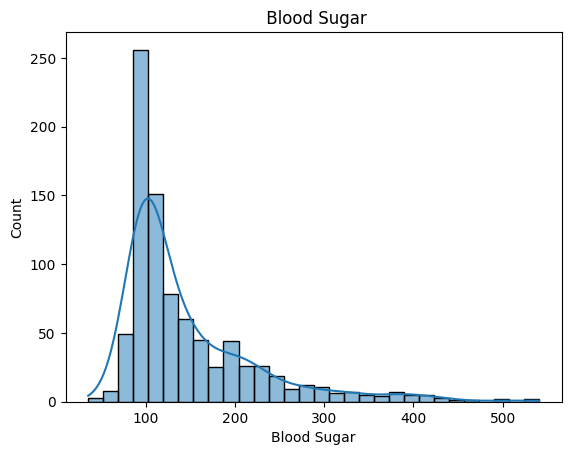

In [46]:
sns.histplot(df['Blood sugar'], bins=30, kde=True)
plt.title(' Blood Sugar')
plt.xlabel('Blood Sugar')
plt.ylabel('Count')
plt.show()


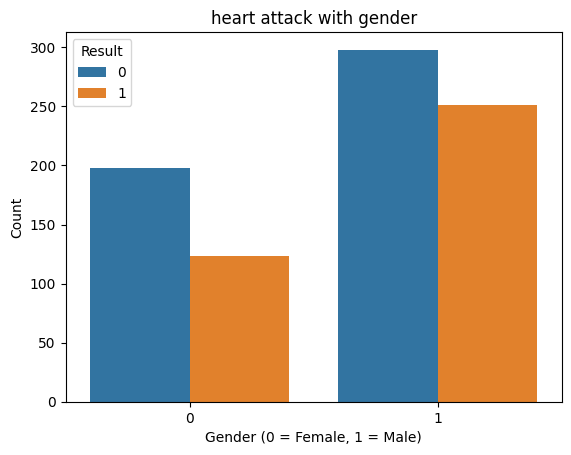

In [47]:
sns.countplot(x='Gender', hue='Result', data=df)
plt.title('heart attack with gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


C:\Users\adilm\AppData\Local\Temp\ipykernel_17056\3690146252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=h,x='Age',y='Result',palette='viridis')


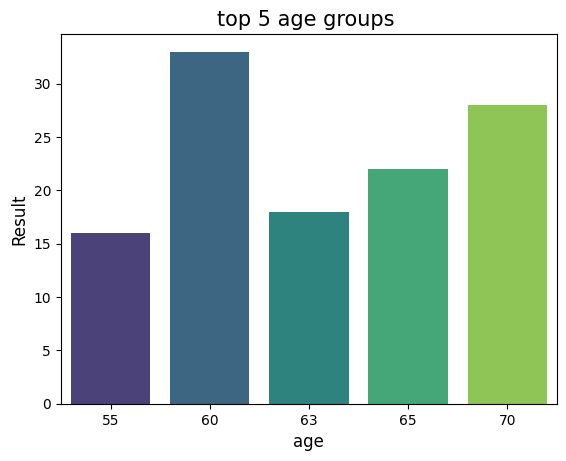

In [54]:
hellow=df.groupby('Age')['Result'].sum().sort_values(ascending=False).head(5)
h=hellow.reset_index()
sns.barplot(data=h,x='Age',y='Result',palette='viridis')
plt.title("top 5 age groups ",fontsize=15)
plt.xlabel("age",fontsize=12)
plt.ylabel("Result",fontsize=12)
plt.show()


In [55]:
df.head(0)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result


C:\Users\adilm\AppData\Local\Temp\ipykernel_17056\1826239413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=h,x='Blood sugar',y='Result',palette='viridis')


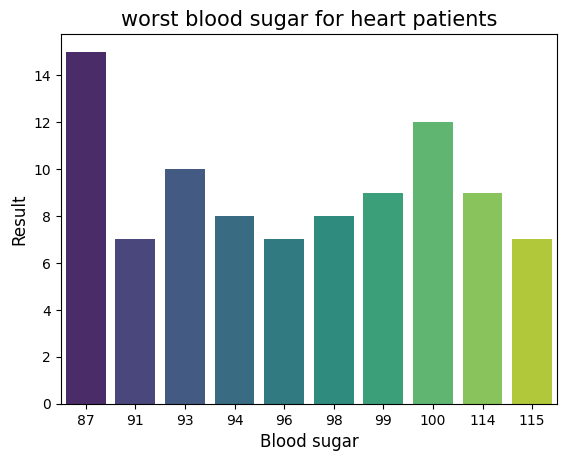

In [58]:
hellow=df.groupby('Blood sugar')['Result'].sum().sort_values(ascending=False).head(10)
h=hellow.reset_index()
sns.barplot(data=h,x='Blood sugar',y='Result',palette='viridis')
plt.title("worst blood sugar for heart patients",fontsize=15)
plt.xlabel("Blood sugar",fontsize=12)
plt.ylabel("Result",fontsize=12)
plt.show()


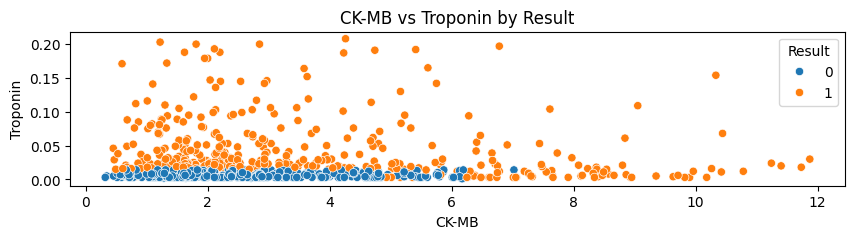

In [62]:
plt.figure(figsize=(10,2))
sns.scatterplot(data=df, x='CK-MB', y='Troponin', hue='Result')
plt.title("CK-MB vs Troponin by Result")
plt.show()

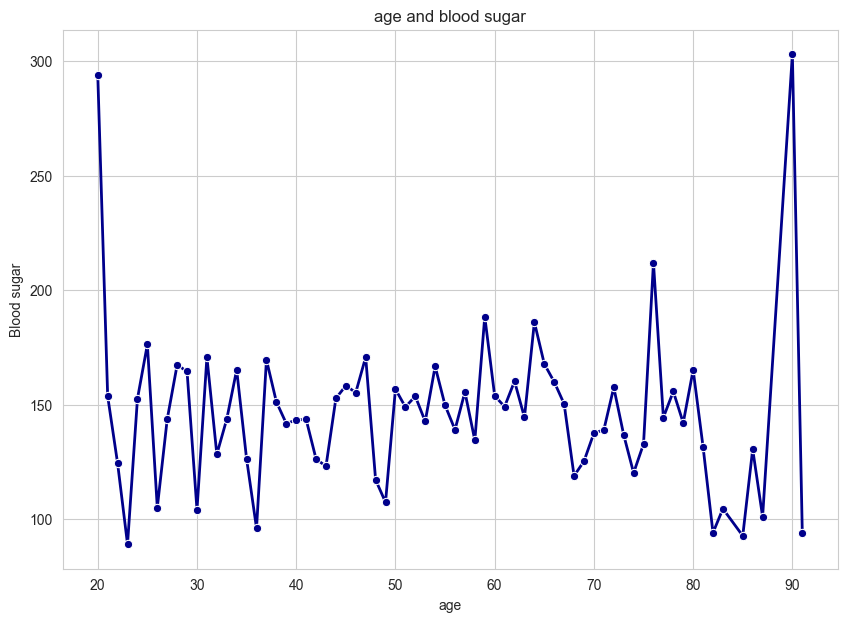

In [66]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid') # Set the plot style
sns.lineplot(data=df, x='Age', y='Blood sugar', color='darkblue', linestyle='-', linewidth=2, marker='o', errorbar=None) 
plt.title("age and blood sugar") 
plt.xlabel("age") 
plt.ylabel("Blood sugar") 
plt.show()

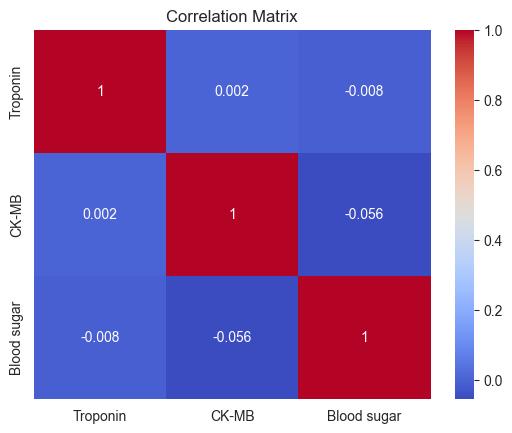

In [67]:
df['CK-MB'] = pd.to_numeric(df['CK-MB'], errors='coerce')  
df['Troponin'] = pd.to_numeric(df['Troponin'], errors='coerce')

sns.heatmap(df[['Troponin', 'CK-MB', 'Blood sugar']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [68]:
#now biulding a model

In [71]:
y=df['Result']
x=df.drop('Result',axis=True)

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
model=LogisticRegression()

In [84]:
model.fit(x_train,y_train)

C:\Users\adilm\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
y_pred=model.predict(x_test)

In [87]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6724137931034483
Precision: 0.7068965517241379
Recall: 0.5061728395061729
F1 Score: 0.5899280575539568
Confusion Matrix:
 [[76 17]
 [40 41]]


In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [92]:
nmodel = LogisticRegression()
nmodel.fit(x_train_scaled, y_train)

# Predictions
y_predn = model.predict(x_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_predn))


Accuracy: 0.6494252873563219


C:\Users\adilm\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train, y_train)

# Predictions
y_pred = rf.predict(x_test)

# Accuracy and report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9712643678160919
Precision: 0.9871794871794872
Recall: 0.9506172839506173
F1 Score: 0.9685534591194969
Confusion Matrix:
 [[92  1]
 [ 4 77]]
